In [3]:
import pandas as pd
from urllib.parse import urlparse
import re
import ipaddress

# Load the dataset
df = pd.read_csv('urldata.csv')

# Inspect data
df.sample(100)


,Unnamed: 0,url,label,result
442278,442278,http://sitesumo.com/TECHNICAL-SERVICE/main.html,malicious,1
125403,125403,https://www.abebooks.co.uk/9782761306645/Lency...,benign,0
255429,255429,https://www.mylife.com/erniefenn,benign,0
323205,323205,https://www.wikidoc.org/index.php/Shapiro-Wilk...,benign,0
365298,365298,http://euroscatola.it/vibe/976fcafe4ab2f87eb45...,malicious,1
...,...,...,...,...
362032,362032,http://americanas.com.br/produto/garantia/1271...,malicious,1
221515,221515,https://www.intense-workout.com/ab_lounge.html,benign,0
189256,189256,https://www.facebook.com/pages/Soul-City-Serie...,benign,0
395935,395935,http://juanita.esy.es/root/panel/panel/,malicious,1


In [5]:
# feature extraction preformed by URLFeatureExtraction.py
# python URLFeatureExtraction.py urldata.csv returns featuredata.csv
df = pd.read_csv('featuredata.csv', on_bad_lines='skip')

features = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                        'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
                        'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

In [6]:
# Convert the features into separate columns
# df_features = pd.DataFrame(df['features'].tolist(), index=df.index, columns=features)

# Combine the extracted features with the original DataFrame
# df_combined = pd.concat([df, df_features], axis=1)
df = df.dropna(subset=['Label'])


In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Define X (features) and y (target)
X = df[features]
y = df['Label']

# Step 1: Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Use SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train the model on the resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 4: Make predictions on the test set
y_pred = rf_model.predict(X_test)



In [8]:
# Feature extracted URLs tested
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')



c:\Users\kesha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6023 - loss: 0.6589 - val_accuracy: 0.7342 - val_loss: 0.5253
Epoch 2/5
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7243 - loss: 0.5451 - val_accuracy: 0.7410 - val_loss: 0.5194
Epoch 3/5
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7379 - loss: 0.5300 - val_accuracy: 0.7461 - val_loss: 0.5093
Epoch 4/5
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7370 - loss: 0.5244 - val_accuracy: 0.7408 - val_loss: 0.5011
Epoch 5/5
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7414 - loss: 0.5234 - val_accuracy: 0.7479 - val_loss: 0.5094
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.5078
Test Accuracy: 0.7478868365287781


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare the data (0 for benign, 1 for phishing)

# Tokenize the URLs (character-level tokenization)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['URL'])

# Convert the URLs into sequences of integers
url_sequences = tokenizer.texts_to_sequences(df['URL'])

# Pad the sequences to make them of equal length
max_sequence_length = 100  # can be adjusted based on data
X = pad_sequences(url_sequences, maxlen=max_sequence_length)

# Target labels
y = df['Label'].values

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the LSTM model
vocab_size = len(tokenizer.word_index) + 1  # Total number of unique characters
embedding_dim = 50  # Size of the character embedding vectors

model = Sequential()
# Embedding layer (convert each character to a dense vector)
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
# LSTM layer
model.add(LSTM(128, return_sequences=False))
# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 92s 315ms/step - accuracy: 0.8367 - loss: 0.3437 - val_accuracy: 0.9675 - val_loss: 0.1157
Epoch 2/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 82s 293ms/step - accuracy: 0.9691 - loss: 0.1108 - val_accuracy: 0.9710 - val_loss: 0.1019
Epoch 3/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 74s 265ms/step - accuracy: 0.9752 - loss: 0.0903 - val_accuracy: 0.9773 - val_loss: 0.0849
Epoch 4/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 75s 268ms/step - accuracy: 0.9863 - loss: 0.0511 - val_accuracy: 0.9917 - val_loss: 0.0287
Epoch 5/5
278/278 ━━━━━━━━━━━━━━━━━━━━ 73s 263ms/step - accuracy: 0.9878 - loss: 0.0449 - val_accuracy: 0.9877 - val_loss: 0.0464
278/278 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9865 - loss: 0.0471
Test Accuracy: 0.9877155423164368


In [11]:
# Save the trained GRU model
model.save('phishing_lstm_model.keras')

# Save the tokenizer using pickle
import pickle

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


Epoch 1/5
888/888 ━━━━━━━━━━━━━━━━━━━━ 87s 98ms/step - accuracy: 0.9803 - loss: 0.0619 - val_accuracy: 0.9920 - val_loss: 0.0298
Epoch 2/5
888/888 ━━━━━━━━━━━━━━━━━━━━ 142s 98ms/step - accuracy: 0.9922 - loss: 0.0267 - val_accuracy: 0.9911 - val_loss: 0.0324
Epoch 3/5
888/888 ━━━━━━━━━━━━━━━━━━━━ 91s 102ms/step - accuracy: 0.9943 - loss: 0.0205 - val_accuracy: 0.9930 - val_loss: 0.0252
Epoch 4/5
888/888 ━━━━━━━━━━━━━━━━━━━━ 89s 101ms/step - accuracy: 0.9937 - loss: 0.0221 - val_accuracy: 0.9904 - val_loss: 0.0306
Epoch 5/5
888/888 ━━━━━━━━━━━━━━━━━━━━ 93s 105ms/step - accuracy: 0.9932 - loss: 0.0234 - val_accuracy: 0.9939 - val_loss: 0.0223
278/278 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step


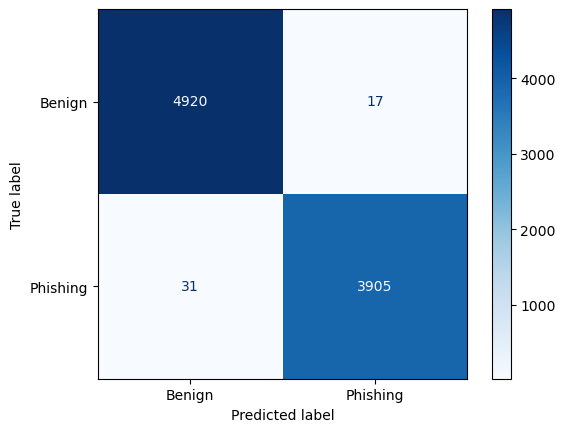

In [13]:
history = model.fit(
    X_train, y_train, 
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=5, 
    batch_size=32
)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# step 1: make predictions on test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# step 2: gererate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# step 3: display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign","Phishing"])
disp.plot(cmap="Blues", values_format='d')

Epoch 1/10
888/888 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9927 - val_loss: 0.0210
Epoch 2/10
888/888 ━━━━━━━━━━━━━━━━━━━━ 87s 98ms/step - accuracy: 0.9957 - loss: 0.0132 - val_accuracy: 0.9948 - val_loss: 0.0172
Epoch 3/10
888/888 ━━━━━━━━━━━━━━━━━━━━ 92s 103ms/step - accuracy: 0.9947 - loss: 0.0159 - val_accuracy: 0.9959 - val_loss: 0.0175
Epoch 4/10
888/888 ━━━━━━━━━━━━━━━━━━━━ 137s 97ms/step - accuracy: 0.9964 - loss: 0.0116 - val_accuracy: 0.9954 - val_loss: 0.0183
Epoch 5/10
888/888 ━━━━━━━━━━━━━━━━━━━━ 90s 101ms/step - accuracy: 0.9967 - loss: 0.0102 - val_accuracy: 0.9956 - val_loss: 0.0166
Epoch 6/10
888/888 ━━━━━━━━━━━━━━━━━━━━ 91s 103ms/step - accuracy: 0.9979 - loss: 0.0085 - val_accuracy: 0.9970 - val_loss: 0.0146
Epoch 7/10
888/888 ━━━━━━━━━━━━━━━━━━━━ 140s 101ms/step - accuracy: 0.9983 - loss: 0.0078 - val_accuracy: 0.9962 - val_loss: 0.0146
Epoch 8/10
888/888 ━━━━━━━━━━━━━━━━━━━━ 90s 102ms/step - accuracy: 0.9985 - loss: 0.

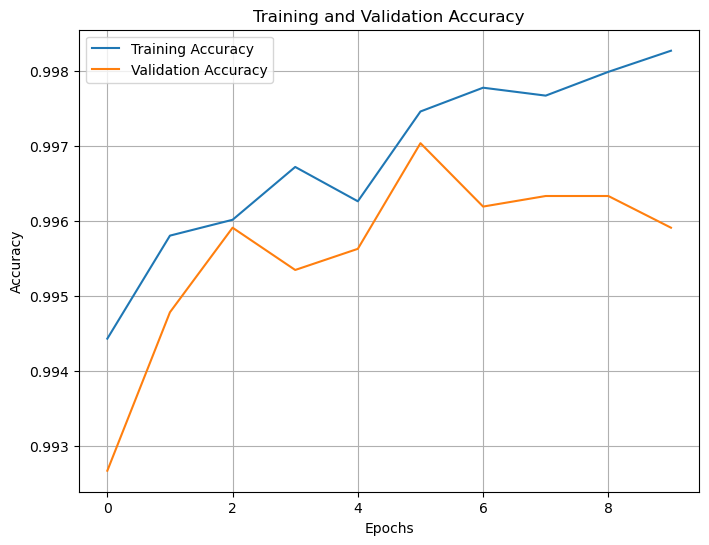

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
history = model.fit(
    X_train, y_train, 
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=10, 
    batch_size=32
)

def plot_training_history(history):
    plt.figure(figsize=(8, 6))
    
    # Plot the accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    
    # Add labels and legend
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage: assuming you have a 'history' object
plot_training_history(history)
